# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

api_key = "a4dc8840d0d845599237bfb6fed86b11"


#Import citipy to determine closest city based on latitude and longitude
from citipy import citipy


#Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [4]:
#Create lists for holding latitude and longitudes, cities and countries
lat_longs = []
cities = []
countries = []

#Create the random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
longs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_longs = zip(lats, longs)

#Identify nearest city for each lat and long combination using citipy
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    country = citipy.nearest_city(lat_long[0], lat_long[1]).country_code
    # If the city is unique, then add it to cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

#Show the city count
print(len(cities))

598


In [5]:
#Create a dataframe to store the data
city_data = pd.DataFrame({'City': cities, 'Lat': "", 'Long': "", 'Max Temp': "", 'Humidity': "",
                          'Cloudiness': "", 'Humidity': "", 'Country': countries, 'Date': ""})

#Preview the dataframe
city_data.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Country,Date
0,joshimath,,,,,,IN,
1,pasni,,,,,,PK,
2,cidreira,,,,,,BR,
3,tuktoyaktuk,,,,,,CA,
4,saint-philippe,,,,,,RE,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#Create variables to count record num and set
record_num = 1
record_set = 1

#Assign variable for the base url for the api call
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

#Run the API call for each city
print('''
Beginning Data Retrieval
-----------------------------''')

for index, row in city_data.iterrows(): 
    #Create the query url for the API call
    query_url = base_url + row['City'] + ',' + row['Country'] + '&APPID=' + api_key
    
    #API call
    response = requests.get(query_url).json()
    
    #Add an exception script in case the city is not found
    try: 
        #Print meassage to show user that the data is being retrieved
        print(f'Processing Record {record_num} of Set {record_set} | {response["name"]}')
        
        #Add returned data to the city_data dataframe
        city_data.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_data.loc[index, 'Date'] = response['dt']
        city_data.loc[index, 'Humidity'] = response['main']['humidity']
        city_data.loc[index, 'Lat'] = response['coord']['lat']
        city_data.loc[index, 'Long'] = response['coord']['lon']
        city_data.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_data.loc[index, 'Windspeed'] = response['wind']['speed']
        
        #Increase the record count
        record_num += 1
        
    except (KeyError, IndexError):
        print("City not found....Skipping............")
    
    #Add an If statement for the API call limits
    if record_num == 51:
        record_set += 1
        record_num = 1
        time.sleep(60)
        
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Joshīmath
Processing Record 2 of Set 1 | Pasni
Processing Record 3 of Set 1 | Cidreira
Processing Record 4 of Set 1 | Tuktoyaktuk
Processing Record 5 of Set 1 | Saint-Philippe
Processing Record 6 of Set 1 | Katsuura
Processing Record 7 of Set 1 | Tiksi
Processing Record 8 of Set 1 | Kaitangata
Processing Record 9 of Set 1 | Ushuaia
City not found....Skipping............
Processing Record 10 of Set 1 | Necochea
Processing Record 11 of Set 1 | Sumenep
Processing Record 12 of Set 1 | Punta Arenas
Processing Record 13 of Set 1 | Tuatapere
Processing Record 14 of Set 1 | Castro
Processing Record 15 of Set 1 | Vaini
Processing Record 16 of Set 1 | Xining
Processing Record 17 of Set 1 | Vanimo
Processing Record 18 of Set 1 | Honningsvåg
Processing Record 19 of Set 1 | Pevek
City not found....Skipping............
Processing Record 20 of Set 1 | Sisimiut
Processing Record 21 of Set 1 | Lillehammer
Processing 

Processing Record 29 of Set 4 | Bethanien
Processing Record 30 of Set 4 | Port Hardy
Processing Record 31 of Set 4 | Tubualá
Processing Record 32 of Set 4 | Thompson
Processing Record 33 of Set 4 | Kanash
Processing Record 34 of Set 4 | Chui
Processing Record 35 of Set 4 | Mīāndoāb
Processing Record 36 of Set 4 | Moindou
City not found....Skipping............
Processing Record 37 of Set 4 | Mahébourg
Processing Record 38 of Set 4 | Kindu
City not found....Skipping............
Processing Record 39 of Set 4 | Lebu
Processing Record 40 of Set 4 | Lavrentiya
Processing Record 41 of Set 4 | Ihtiman
Processing Record 42 of Set 4 | Kyshtovka
City not found....Skipping............
Processing Record 43 of Set 4 | Verkhnyaya Inta
Processing Record 44 of Set 4 | Kieta
Processing Record 45 of Set 4 | Tessalit
Processing Record 46 of Set 4 | Ponta do Sol
Processing Record 47 of Set 4 | Nelson Bay
Processing Record 48 of Set 4 | Oistins
Processing Record 49 of Set 4 | Rawson
Processing Record 50 of 

Processing Record 7 of Set 8 | Umluj
City not found....Skipping............
Processing Record 8 of Set 8 | Newport
Processing Record 9 of Set 8 | Ucluelet
Processing Record 10 of Set 8 | Severo-Kuril'sk
City not found....Skipping............
Processing Record 11 of Set 8 | Maribo
Processing Record 12 of Set 8 | Weyburn
Processing Record 13 of Set 8 | Adrar
Processing Record 14 of Set 8 | Amudat
Processing Record 15 of Set 8 | Los Llanos de Aridane
Processing Record 16 of Set 8 | Mount Gambier
Processing Record 17 of Set 8 | San Miguel de Tucumán
Processing Record 18 of Set 8 | Dolores
Processing Record 19 of Set 8 | Idritsa
Processing Record 20 of Set 8 | Kavaratti
Processing Record 21 of Set 8 | Itoman
Processing Record 22 of Set 8 | Huancabamba
Processing Record 23 of Set 8 | Carbonia
Processing Record 24 of Set 8 | Lethem
Processing Record 25 of Set 8 | Richards Bay
Processing Record 26 of Set 8 | Tasiilaq
City not found....Skipping............
Processing Record 27 of Set 8 | Opuwo


Processing Record 34 of Set 11 | Burnie
Processing Record 35 of Set 11 | Udachny

-----------------------------
Data Retrival Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Remove cities with missing data
city_data2 = city_data.dropna()

#Save dataframe to csv
city_data2.to_csv("Output_Data/CityWeatherData.csv", index=False, header=True)

#Show dataframe 
city_data2.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Country,Date,Windspeed
0,joshimath,30.57,79.57,71.94,46,30,IN,1600140768,4.85
1,pasni,25.26,63.47,87.39,30,100,PK,1600140769,17.45
2,cidreira,-30.18,-50.21,51.82,62,90,BR,1600140769,4.21
3,tuktoyaktuk,69.45,-133.04,32,90,75,CA,1600140769,9.17
4,saint-philippe,-21.36,55.77,63,59,40,RE,1600140769,6.93


In [58]:
city_data2["Lat"] = pd.to_numeric(city_data2["Lat"])
city_data2["Long"] = pd.to_numeric(city_data2["Long"])
city_data2["Max Temp"] = pd.to_numeric(city_data2["Max Temp"])
city_data2["Humidity"] = pd.to_numeric(city_data2["Humidity"])
city_data2["Cloudiness"] = pd.to_numeric(city_data2["Cloudiness"])
city_data2.describe()

,Lat,Long,Max Temp,Humidity,Cloudiness,Windspeed
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000
mean,17.297514,19.094280,65.534841,70.474766,50.461682,8.061832
std,34.151822,89.117062,15.077429,20.350184,38.509082,5.301254
min,-54.800000,-175.200000,23.110000,3.000000,0.000000,0.250000
25%,-12.840000,-57.620000,54.025000,60.000000,4.500000,3.925000
50%,19.290000,25.050000,68.000000,74.000000,55.000000,7.000000
75%,47.605000,92.760000,77.750000,86.000000,89.500000,11.180000
max,78.220000,179.320000,97.570000,100.000000,100.000000,42.320000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#None with humidity over 100%

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

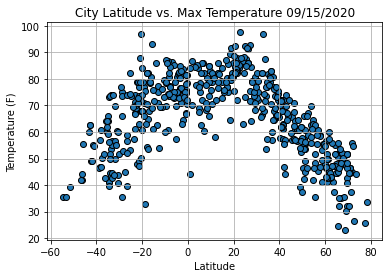

In [63]:
#Create scatter plot for latitude and temp
plt.scatter(city_data2["Lat"], city_data2["Max Temp"], marker="o", edgecolors="black")

#Add graph title, x and y labels, grid and grid
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the graph to file
plt.savefig("Output_Data/City Latitude vs. Max Temperature.png")

#Show graph to folder
plt.show()

## Based on the graph of Max Temperature and Latitude it appears that the higher max temps occur just below and above the 
## equator.

## Latitude vs. Humidity Plot

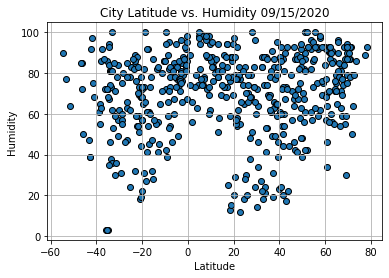

In [60]:
#Create scatter plot for latitude and humidity
plt.scatter(city_data2["Lat"], city_data2["Humidity"], marker="o", edgecolors="black")

#Add graph title, x and y labels, grid and grid
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#Save the graph to file
plt.savefig("Output_Data/City Latitude vs. Humidity.png")

#Show graph to folder
plt.show()

## Based on the graph of humidity and latitude it appears that the min humidity
## is the highest at or just above the equator with the lowest humidity range is around the + or - 20 degrees latitude

## Latitude vs. Cloudiness Plot

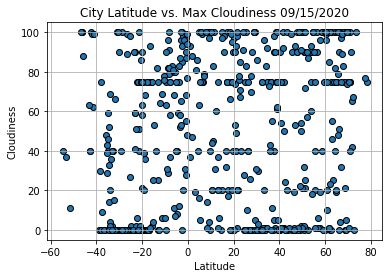

In [61]:
#Create scatter plot for latitude and cloudiness
plt.scatter(city_data2["Lat"], city_data2["Cloudiness"], marker="o", edgecolors="black")

#Add graph title, x and y labels, grid and grid
plt.title(f'City Latitude vs. Max Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#Save the graph to folder
plt.savefig("Output_Data/City Latitude vs. Cloudiness.png")

#Show graph
plt.show()

## Based on the graph of cloudiness and latitude 
## there doesn't appear to be any relation to humidity based on the city's latitude.

## Latitude vs. Wind Speed Plot

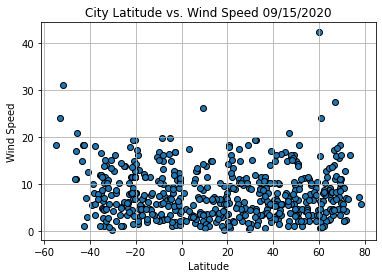

In [62]:
#Create scatter plot for latitude and wind speed
plt.scatter(city_data2["Lat"], city_data2["Windspeed"], marker="o", edgecolors="black")

#Add graph title, x and y labels, grid and grid
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#Save the graph to folder
plt.savefig("Output_Data/City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

## Based on the graph for wind speed it appears that the wind speed is fairly consistent,
## with the exception of a few possible outliers.

## Linear Regression

In [70]:
#Add Linregress dependancy from scipy.stats
from scipy.stats import linregress

#Create dataframe for northern hemisphere and southern hemisphere
n_hem = city_data2.loc[city_data2["Lat"] >= 0.0]
n_hem.reset_index(inplace=True)

s_hem = city_data2.loc[city_data2["Lat"] < 0.0]
s_hem.reset_index(inplace=True)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6675526175503204


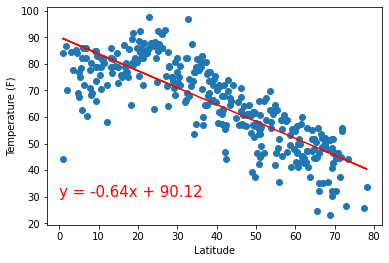

<Figure size 432x288 with 0 Axes>

In [71]:
#Add the linear regression equation and line and plot Northern Hemisphere Max Temps
x_values = n_hem["Lat"]
y_values = n_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()
#Save the figure
plt.savefig("Output_Data/Northern Hemisphere vs. Max Temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4552721663908447


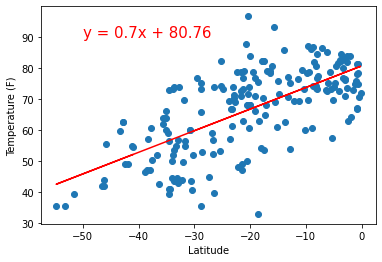

<Figure size 432x288 with 0 Axes>

In [72]:
#Add the linear regression equation and line to plot Southern Hemisphere Max Temps
x_values = s_hem["Lat"]
y_values = s_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()
#Save the figure
plt.savefig("Output_Data/Southern Hemisphere vs. Max Temp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006662976382291605


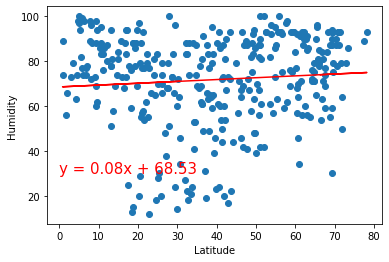

<Figure size 432x288 with 0 Axes>

In [73]:
#Add the linear regression equation and line and plot Northern Hemisphere Humidity
x_values = n_hem["Lat"]
y_values = n_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()
#Save the figure
plt.savefig("Output_Data/Northern Hemisphere vs. Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04717110052899401


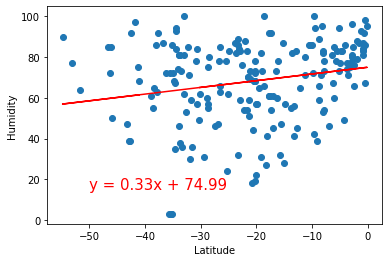

<Figure size 432x288 with 0 Axes>

In [83]:
#Add the linear regression equation and line and plot Southern Hemisphere Humidity
x_values = s_hem["Lat"]
y_values = s_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()
#Save the figure
plt.savefig("Output_Data/Southern Hemisphere vs. Humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0015727725922244967


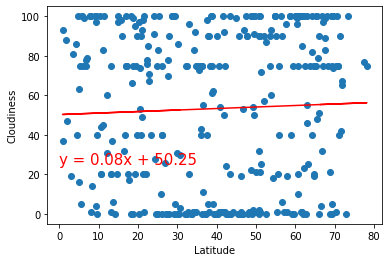

<Figure size 432x288 with 0 Axes>

In [84]:
#Add the linear regression equation and line and plot Northern Hemisphere Cloudiness
x_values = n_hem["Lat"]
y_values = n_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()
#Save the figure
plt.savefig("Output_Data/Northern Hemisphere vs. Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06332707164469457


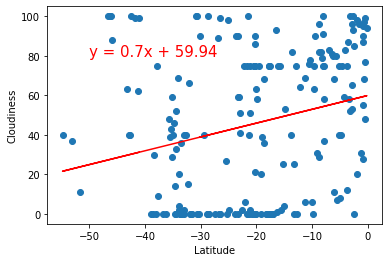

<Figure size 432x288 with 0 Axes>

In [86]:
#Add the linear regression equation and line and plot Southern Hemisphere Cloudiness
x_values = s_hem["Lat"]
y_values = s_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()
#Save the figure
plt.savefig("Output_Data/Southern Hemisphere vs. Cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.014020048920287888


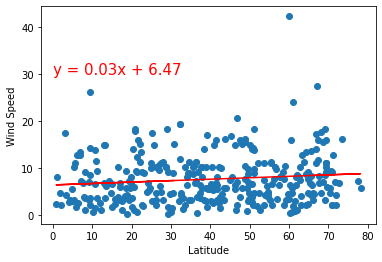

<Figure size 432x288 with 0 Axes>

In [77]:
#Add the linear regression equation and line and plot Northern Hemisphere Wind Speed
x_values = n_hem["Lat"]
y_values = n_hem["Windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()
#Save the figure
plt.savefig("Output_Data/Northern Hemisphere vs. Wind Speed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04095760266598782


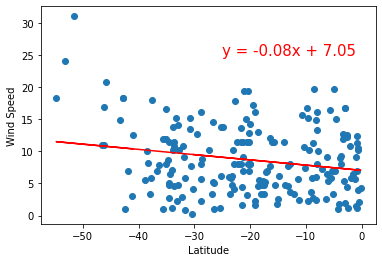

<Figure size 432x288 with 0 Axes>

In [89]:
#Add the linear regression equation and line and plot Southern Hemisphere Wind Speed
x_values = s_hem["Lat"]
y_values = s_hem["Windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()
#Save the figure
plt.savefig("Output_Data/Southern Hemisphere vs. Wind Speed.png")